In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import tensorflow as tf 
from tensorflow import keras 
import os 
import glob
import librosa as lib
import IPython.display as ipd

In [2]:
#sample audio
filename = 'C:/Users/Ishant Naru/Desktop/free-spoken-digit-dataset-master/recordings/0_jackson_5.wav'

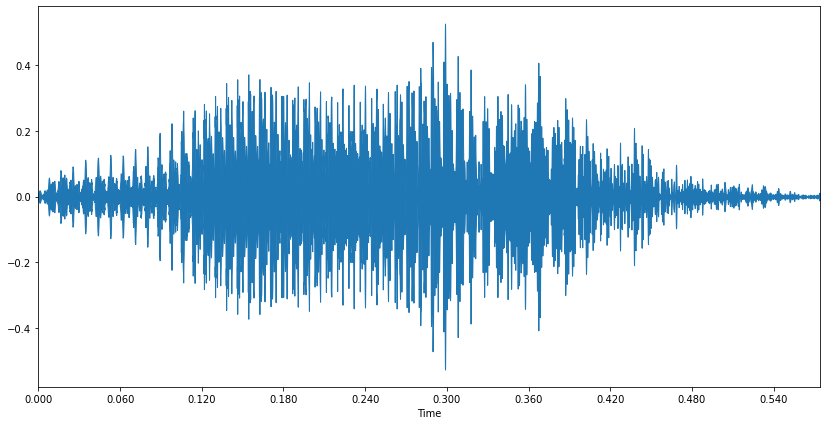

In [3]:
#plotting a sound as wave in librosa 
plt.figure(figsize=(14,7))
ipd.Audio(filename)

data,sample_rate=lib.load(filename)

from librosa import display 

display.waveplot(data, sr=sample_rate)

In [4]:
#librosa sample rate of the audio file
print(sample_rate)

22050


In [5]:
#scipy sample rate of the audio file 
from scipy.io import wavfile as wav
 
wave_sample_rate, wave_audio = wav.read(filename) 
print(wave_sample_rate)

8000


In [6]:
#original audio data from scipy
wave_audio

array([ 305,  365,  419, ..., -313, -342, -346], dtype=int16)

In [7]:
#scaled audio data between -1 and 1 from librosa 
data

array([ 0.00909716,  0.01102248,  0.01150367, ..., -0.01067717,
       -0.00757722,  0.        ], dtype=float32)

In [63]:
files_dir = 'C:/Users/Ishant Naru/Desktop/free-spoken-digit-dataset-master/recordings/'

#Creating a function to convert and divide file names into a list for seperate digits 
def file_to_list(dig, dir_=files_dir):
    files = glob.glob(dir_+'/'+dig+'*.wav')
    emp_list=[]    
    for file in files:
        emp_list.append(os.path.basename(file))
    return emp_list
    

In [64]:
zero = file_to_list('0')
one = file_to_list('1')
two = file_to_list('2')
three = file_to_list('3')
four = file_to_list('4')
five = file_to_list('5')
six = file_to_list('6')
seven = file_to_list('7')
eight = file_to_list('8')
nine = file_to_list('9')

In [65]:
#function to convert individual digit list to individual dataframe
def list_to_df(list_, class_):
    df = pd.DataFrame(list_, columns=['Filename'])
    df['class'] = class_
    return df 

In [66]:
zero_df = list_to_df(zero, '0')
one_df = list_to_df(one, '1')
two_df = list_to_df(two, '2')
three_df = list_to_df(three, '3')
four_df = list_to_df(four, '4')
five_df = list_to_df(five, '5')
six_df = list_to_df(six, '6')
seven_df = list_to_df(seven, '7')
eight_df = list_to_df(eight, '8')
nine_df = list_to_df(nine, '9')

In [67]:
#Uniting all dataframes into one dataframe containing all file informations 
frames = [zero_df, one_df, two_df, three_df, four_df, 
          five_df, six_df, seven_df, eight_df, nine_df]

audio_dataframe = pd.concat(frames)

In [68]:
audio_dataframe.iloc[302]

Filename    2_jackson_10.wav
class                      2
Name: 2, dtype: object

# Mel-Frequency Cepstral Coefficient for extracting audio features 

mfccs=lib.feature.mfcc(y=data, sr=sample_rate, n_mfcc=30)
print(mfccs.shape)

In [69]:
#function to extract features from audio files using MFCC
def audio_features(file):
    audio_data, sample_rate = lib.load(file, res_type='kaiser_fast')
    mfcc_features=lib.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=50)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis = 0)
    return mfcc_scaled_features

In [71]:
from tqdm import tqdm 

extracted_features = []

#iterating through each audio file to extract its features 
for index_num, row in tqdm(audio_dataframe.iterrows()):
    file_name=os.path.join(os.path.abspath(files_dir), str(row['Filename']))
    digit_labels = row['class']
    data=audio_features(file_name)
    extracted_features.append([data, digit_labels])

1500it [00:58, 25.44it/s]


In [74]:
#converting extracted features from list to dataframe 
extracted_features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
extracted_features.head()

,features,class
0,"[-301.09082, 193.94704, -16.108715, -1.6334556...",0
1,"[-343.8217, 207.41052, -4.387587, 7.7349954, 2...",0
2,"[-333.03653, 199.69176, -0.453979, 13.560019, ...",0
3,"[-326.03317, 203.88045, -4.821429, 5.339405, 1...",0
4,"[-320.8753, 199.4254, -10.091912, -3.5711324, ...",0


In [75]:
#Splitting dataframe into Independent and Dependent Variables

X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [77]:
X.shape

(1500, 50)

In [83]:
y.shape

(1500, 10)

In [89]:
#Train Test Split 
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.10, random_state=2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15,
                                                     random_state=2)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(1147, 50)
(150, 50)
(203, 50)


In [175]:
#model creation 
from tensorflow.keras import Sequential, layers

model = Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(50,)),
#     layers.Conv2D(32, (3,3), activation='relu'),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.Conv2D(128, (3,3), activation='relu'),
#     layers.Conv2D(256, (3,3), activation='relu'),
#     layers.Dropout(0.4),
    
#     layers.Flatten(),
    layers.Dense(500, activation='relu', input_shape=(50,)),
    layers.Dropout(0.3),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 500)               25500     
_________________________________________________________________
dropout_21 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_22 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)              

In [176]:
model.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [177]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('Digit_audio_class.h5', save_best_only=True)
early_stop_cb=keras.callbacks.EarlyStopping(min_delta=0.0001, patience=10, restore_best_weights=True)

In [178]:
history = model.fit(
                    X_train, y_train,
                    batch_size=30,
                    epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/200
39/39 [==============================] - 1s 11ms/step - loss: 14.4113 - accuracy: 0.1099 - val_loss: 2.2250 - val_accuracy: 0.2512
Epoch 2/200
39/39 [==============================] - 0s 9ms/step - loss: 4.0485 - accuracy: 0.1203 - val_loss: 2.2633 - val_accuracy: 0.0788
Epoch 3/200
39/39 [==============================] - 0s 5ms/step - loss: 2.9257 - accuracy: 0.1255 - val_loss: 2.2832 - val_accuracy: 0.0936
Epoch 4/200
39/39 [==============================] - 0s 5ms/step - loss: 2.6041 - accuracy: 0.1386 - val_loss: 2.2673 - val_accuracy: 0.0936
Epoch 5/200
39/39 [==============================] - 0s 5ms/step - loss: 2.4371 - accuracy: 0.1473 - val_loss: 2.2554 - val_accuracy: 0.1626
Epoch 6/200
39/39 [==============================] - 0s 6ms/step - loss: 2.3059 - accuracy: 0.1874 - val_loss: 2.2272 - val_accuracy: 0.1478
Epoch 7/200
39/39 [==============================] - 0s 7ms/step - loss: 2.2958 - accuracy: 0.1770 - val_loss: 2.1628 - val_accuracy: 0.1724
Epoch 8/200

<function matplotlib.pyplot.show(close=None, block=None)>

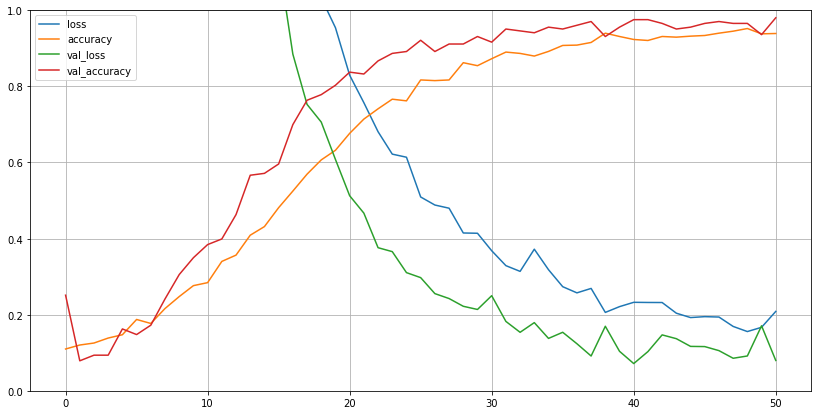

In [179]:
pd.DataFrame(history.history).plot(figsize=(14,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [180]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9667


[0.1635729968547821, 0.9666666388511658]

In [190]:
pred_dir = 'C:/Users/Ishant Naru/Desktop/free-spoken-digit-dataset-master/0.wav'
pred = audio_features(pred_dir)
pred = pred.reshape(1,-1)

In [191]:
model.predict_classes(pred)

array([0], dtype=int64)